In [1]:
# explore exercise

In [2]:
import pandas as pd
import re
import unicodedata
import pandas as pd
import nltk
from wordcloud import WordCloud

from acquire import get_Codeup_blog_articles
from prepare import pull_article_astext
from prepare import clean


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/garygonzenbach/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/garygonzenbach/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

In [4]:
df = pd.read_csv('./spam_clean.csv')
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.text = df.text.apply(clean)

In [6]:
all_text = ' '.join(df.text)
spam_text = ' '.join(df[df.label == 'spam'].text)
ham_text = ' '.join(df[df.label == 'ham'].text)

In [7]:
all_text = clean(all_text)
spam_text = clean(spam_text)
ham_text = clean(ham_text)

In [8]:
all_freq = pd.Series(all_text.split()).value_counts()
spam_freq = pd.Series(spam_text.split()).value_counts()
ham_freq = pd.Series(ham_text.split()).value_counts()

In [9]:
word_counts = pd.concat([all_freq, spam_freq, ham_freq], sort=True, axis=1)
word_counts.columns = ['all', 'spam', 'ham']
word_counts = word_counts.fillna(0).apply(lambda s: s.astype(int))


In [10]:
word_counts['p_spam'] = word_counts.spam / word_counts['all']
word_counts['p_ham'] = word_counts.ham / word_counts['all']


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

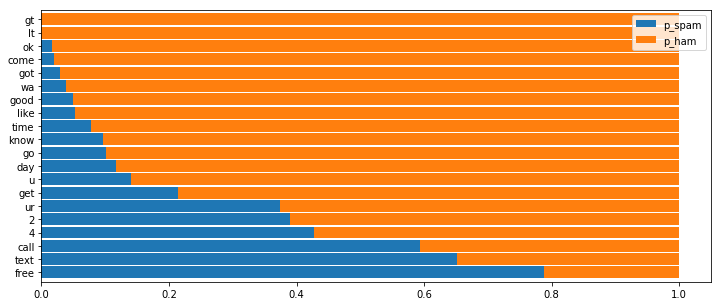

In [12]:
word_counts.sort_values(by='all')\
    .tail(20)\
    [['p_spam', 'p_ham']]\
    .sort_values(by='p_ham')\
    .plot.barh(stacked=True, figsize=(12, 5), width=.9)

In [13]:
word_counts[(word_counts.spam > 10) & (word_counts.ham > 10)]\
    .assign(ratio=lambda df: df.spam / df.ham)\
    .sort_values(by='ratio')

,all,spam,ham,p_spam,p_ham,ratio
good,246,12,234,0.048780,0.951220,0.051282
like,248,13,235,0.052419,0.947581,0.055319
need,184,11,173,0.059783,0.940217,0.063584
n,153,11,142,0.071895,0.928105,0.077465
time,245,19,226,0.077551,0.922449,0.084071
pls,134,11,123,0.082090,0.917910,0.089431
dont,144,12,132,0.083333,0.916667,0.090909
great,115,11,104,0.095652,0.904348,0.105769
think,146,14,132,0.095890,0.904110,0.106061
know,271,26,245,0.095941,0.904059,0.106122


(-0.5, 1199.5, 999.5, -0.5)

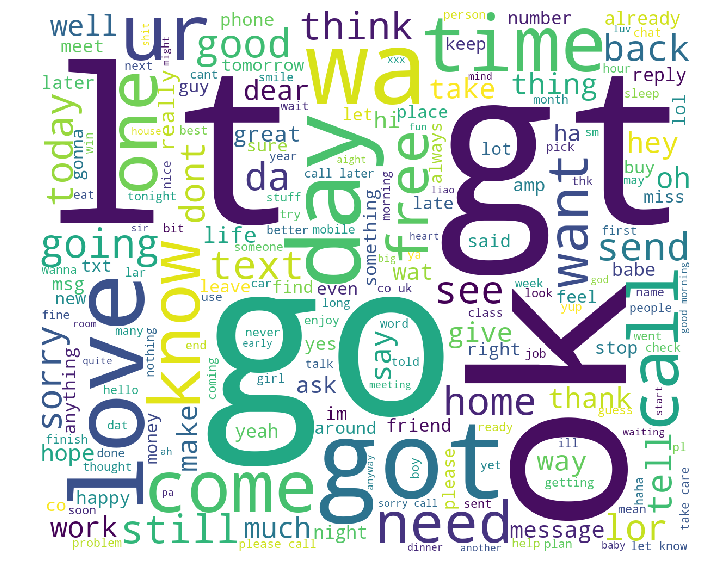

In [14]:
# pip install WordCloud


cloud = WordCloud(background_color='white', width=1200, height=1000).generate(all_text)
plt.figure(figsize=(12, 10))
plt.imshow(cloud)
plt.axis('off')

(-0.5, 1199.5, 999.5, -0.5)

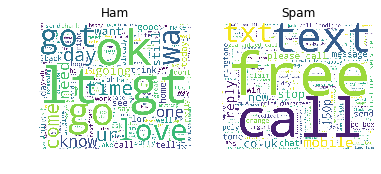

In [15]:
ham_cloud = WordCloud(background_color='white', width=1200, height=1000).generate(ham_text)
spam_cloud = WordCloud(background_color='white', width=1200, height=1000).generate(spam_text)

plt.subplot(121)
plt.imshow(ham_cloud)
plt.title('Ham')
plt.axis('off')

plt.subplot(122)
plt.imshow(spam_cloud)
plt.title('Spam')
plt.axis('off')

In [16]:
# is for "bigram"  - combination of 2 words,   3 for trigram - combinatiof three words
ham_bigrams = pd.Series(nltk.ngrams(ham_text.split(), 2))\
    .value_counts()

In [17]:
frequencies = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}

(-0.5, 1199.5, 799.5, -0.5)

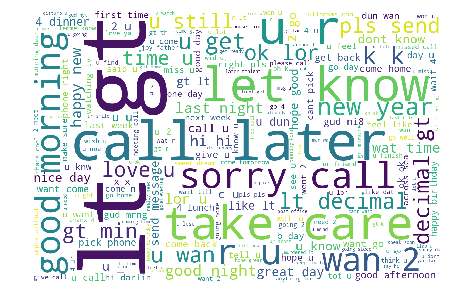

In [18]:
cloud = WordCloud(height=800, width=1200, background_color='white')
ham_cloud = cloud.generate_from_frequencies(frequencies)

plt.figure(figsize=(10, 5))
plt.imshow(ham_cloud)
plt.axis('off')

In [19]:
spam_bigrams = pd.Series(nltk.ngrams(spam_text.split(), 2))\
    .value_counts()

In [20]:
frequencies = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}

(-0.5, 1199.5, 799.5, -0.5)

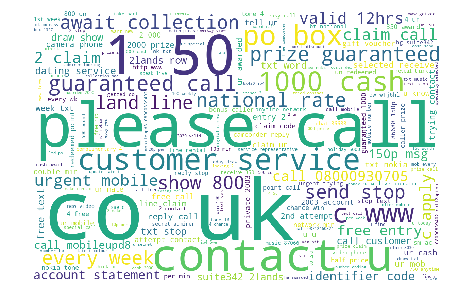

In [21]:
cloud = WordCloud(height=800, width=1200, background_color='white')
spam_cloud = cloud.generate_from_frequencies(frequencies)

plt.figure(figsize=(10, 5))
plt.imshow(spam_cloud)
plt.axis('off')

In [22]:
def make_wordcloud(input_txt,num_wordgrams):
    text_grams = pd.Series(nltk.ngrams(input_txt.split(), num_wordgrams)).value_counts()
    frequencies = {k[0] + ' ' + k[1]: v for k, v in text_grams.to_dict().items()}
    cloud = WordCloud(height=1200, width=1600, background_color='white')
    text_cloud = cloud.generate_from_frequencies(frequencies)
    plt.figure(figsize=(10, 5))
    plt.imshow(text_cloud)
    plt.axis('off')
    return True


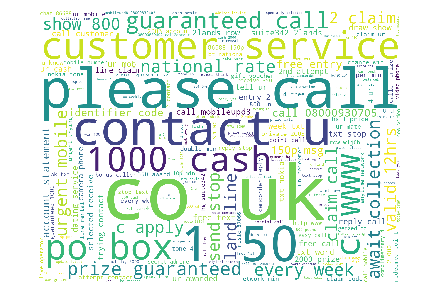

In [23]:
ok = make_wordcloud(spam_text,2)

In [24]:
articles = get_Codeup_blog_articles()

In [26]:
articles.head()

,title,contents
0,<title>Codeup’s Data Science Career Accelerato...,\nThe rumors are true! The time has arrived. C...
1,<title>Data Science Myths - Codeup</title>,\nBy Dimitri Antoniou and Maggie Giust\nData S...
2,<title>Data Science VS Data Analytics: What’s ...,"\nBy Dimitri Antoniou\nA week ago, Codeup laun..."
3,<title>10 Tips to Crush It at the SA Tech Job ...,\n10 Tips to Crush It at the SA Tech Job Fair\...
4,<title>Competitor Bootcamps Are Closing. Is th...,\nCompetitor Bootcamps Are Closing. Is the Mod...


In [25]:
article_txt = pull_article_astext(df,1)

KeyError: 'cleaned_text'